In [1]:
# Stop warnings
import warnings
warnings.filterwarnings("ignore")

# Imports
import os
import sys
import time
import json
import copy
import cortex
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Plotly imports
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Personal imports
sys.path.append("{}/../../../analysis_code/utils".format(os.getcwd()))
from plot_utils import *
from pycortex_utils import draw_cortex, set_pycortex_config_file, load_surface_pycortex, create_colormap, get_rois
from surface_utils import load_surface
from maths_utils import weighted_regression

In [2]:
# Directories
main_dir = '/Users/uriel/disks/meso_shared'
project_dir = 'RetinoMaps'

In [3]:
# General settings
with open('../../settings.json') as f:
    json_s = f.read()
    analysis_info = json.loads(json_s)
TRs = analysis_info['TRs']
subjects = analysis_info['subjects']
rois = analysis_info['rois']
rois_groups = analysis_info['rois_groups']

with open('../../figure_settings.json') as f:
    json_s = f.read()
    figure_info = json.loads(json_s)
plot_groups = figure_info['plot_groups']
fig_width = figure_info['fig_width']

In [4]:
# Set pycortex db and colormaps
cortex_dir = "{}/{}/derivatives/pp_data/cortex".format(main_dir, project_dir)
set_pycortex_config_file(cortex_dir)

port_num = 25000

In [5]:
# Template settings
template_specs = dict(axes_color="rgba(0, 0, 0, 1)",
                      axes_width=2,
                      axes_font_size=15,
                      bg_col="rgba(255, 255, 255, 1)",
                      font='Arial',
                      title_font_size=15,
                      plot_width=1.5)
fig_template = plotly_template(template_specs)
standoff = 8

In [6]:
# Plot settings
roi_colors_dict = {'V1': 'rgb(243, 231, 155)', 
                   'V2': 'rgb(250, 196, 132)', 
                   'V3': 'rgb(248, 160, 126)', 
                   'V3AB': 'rgb(235, 127, 134)', 
                   'LO': 'rgb(150, 0, 90)',  
                   'VO': 'rgb(0, 0, 200)', 
                   'hMT+': 'rgb(0, 25, 255)', 
                   'iIPS': 'rgb(0, 152, 255)', 
                   'sIPS': 'rgb(44, 255, 150)', 
                   'iPCS': 'rgb(151, 255, 0)', 
                   'sPCS': 'rgb(255, 234, 0)', 
                   'mPCS': 'rgb(255, 111, 0)'}


In [7]:
fig_dir = '/Users/uriel/Downloads/test'

# Vertex bar plot group ROI

## Make plot

### Subject

In [49]:
# Specific settings
subject = 'sub-01'
format_ = '170k'
suffix = 'Sac_Pur'

In [46]:
# Load DF 
tsv_dir = '{}/{}/derivatives/pp_data/{}/{}/intertask/tsv'.format(main_dir, project_dir, subject, format_)
active_vertex_roi_tsv_fn = '{}/{}_active_vertex_roi_{}.tsv'.format(tsv_dir, subject, suffix)

df_active_vertex_roi = pd.read_table(active_vertex_roi_tsv_fn)

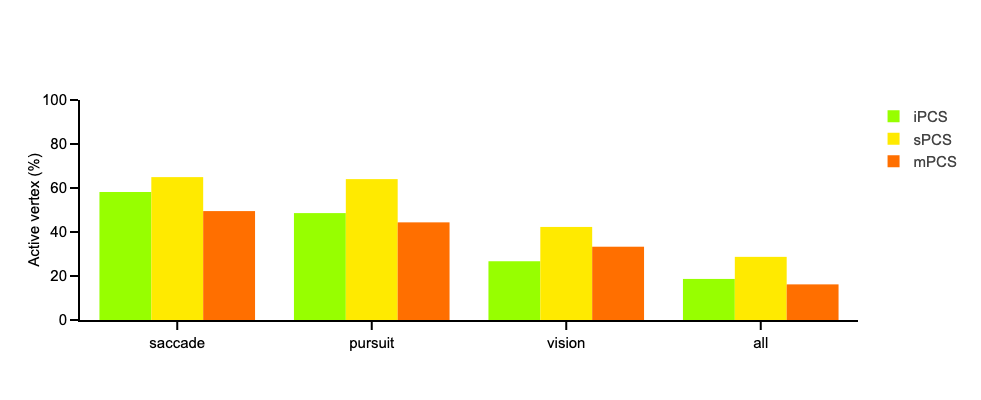

In [48]:
# plot_groups = [['iIPS', 'sIPS']]
plot_groups = [['iPCS', 'sPCS', 'mPCS']]
# Subject
rows, cols = 1, len(plot_groups)
fig = make_subplots(rows=rows, cols=cols, print_grid=False)
for l, line_label in enumerate(plot_groups):
    for j, roi in enumerate(line_label):
        df_roi = df_active_vertex_roi.loc[df_active_vertex_roi['roi']==roi]
        fig.add_trace(go.Bar(x=df_roi['categorie'], 
                             y=df_roi['percentage_active'], 
                             name=roi,  
                             marker=dict(color=roi_colors_dict[roi]), 
                             showlegend=True), 
                      row=1, col=l + 1)
    
fig.update_xaxes(showline=True)
fig.update_yaxes(title='Active vertex (%)', 
                 range=[0,100], 
                 showline=True)

fig.update_layout(template=fig_template, 
                  barmode='group', 
                  height=400, 
                  width=fig_width
                 )


# Export figure
fig_fn = "{}/{}_active_vertex_roi_{}.pdf".format(fig_dir, subject, suffix)
print('Saving pdf: {}'.format(fig_fn))
fig.write_image(fig_fn)

### Group 

In [76]:
# Specific settings
subject = 'group'
format_ = '170k'
suffix = 'Sac_Pur'

In [77]:
# Load DF 
tsv_dir = '{}/{}/derivatives/pp_data/{}/{}/intertask/tsv'.format(main_dir, project_dir, subject, format_)
active_vertex_tsv_fn = '{}/{}_active_vertex_roi_{}.tsv'.format(tsv_dir, subject, suffix)

df_active_vertex_roi = pd.read_table(active_vertex_tsv_fn)

In [78]:
# plot_groups = [['iIPS', 'sIPS']]
plot_groups = [['iPCS', 'sPCS', 'mPCS']]
# group
rows, cols = 1, len(plot_groups)
fig = make_subplots(rows=rows, cols=cols, print_grid=False)
for l, line_label in enumerate(plot_groups):
    for j, roi in enumerate(line_label):
        df_roi = df_active_vertex_roi.loc[df_active_vertex_roi['roi']==roi]
        fig.add_trace(go.Bar(x=df_roi['categorie'], 
                             y=df_roi['median'], 
                             name=roi,  
                             marker=dict(color=roi_colors_dict[roi]), 
                             error_y=dict(type='data', 
                                          array=df_roi['ci_high'] - df_roi['median'], 
                                          arrayminus=df_roi['median'] - df_roi['ci_low'], 
                                          visible=True, 
                                          width=0, 
                                          color='black'), 
                             showlegend=True), 
                      row=1, 
                      col=l + 1)
    
fig.update_xaxes(showline=True)
fig.update_yaxes(title='Active vertex (%)', 
                 range=[0,100], 
                 showline=True)

fig.update_layout(template=fig_template, 
                  barmode='group', 
                  height=400, 
                  width=fig_width
                 )


# Export figure
fig_fn = "{}/{}_active_vertex_roi_{}.pdf".format(fig_dir, subject, suffix)
print('Saving pdf: {}'.format(fig_fn))
fig.write_image(fig_fn)

Saving pdf: /Users/uriel/Downloads/group_active_vertex_roi_Sac_Pur.pdf


### Values

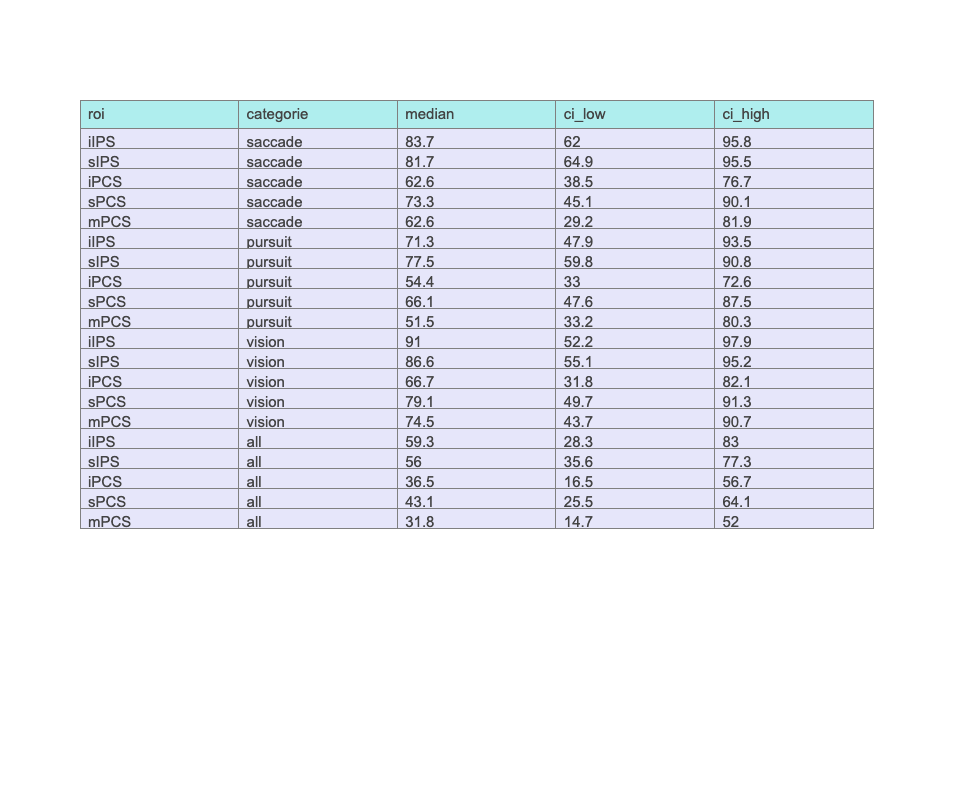

In [26]:
sub_rois =  ['iIPS', 'sIPS', 'iPCS', 'sPCS', 'mPCS']

df_roi = group_rois_area_categorie_df.loc[group_rois_area_categorie_df['roi'].isin(sub_rois)]

fig = go.Figure()
fig.add_trace(go.Table(header=dict(values=list(df_roi.columns), 
                                   fill_color='paleturquoise', 
                                   align='left'), 
                       cells=dict(values=[df_roi[col].round(1) for col in df_roi.columns], 
                                  fill_color='lavender', 
                                  align='left')
                      ))

fig.update_layout(template=fig_template,
                  height=800, 
                  width=800)
fig.write_image("/Users/uriel/Downloads/Surface_percentage_table.pdf".format(subject))
fig.show()

# Vertex bar plot MMP ROI

## Make plot

### Subject

In [51]:
# Specific settings
subject = 'sub-01'
format_ = '170k'
suffix = 'Sac_Pur'

In [54]:
# Load DF 
tsv_dir = '{}/{}/derivatives/pp_data/{}/{}/intertask/tsv'.format(main_dir, project_dir, subject, format_)
active_vertex_roi_mmp_tsv_fn = '{}/{}_active_vertex_roi_mmp_{}.tsv'.format(tsv_dir, subject, suffix)

df_active_vertex_roi_mmp = pd.read_table(active_vertex_roi_mmp_tsv_fn)

In [67]:
categories = ['saccade', 'pursuit', 'vision', 'all']

rows, cols = len(plot_groups), 3 

for n_cat, categorie in enumerate(categories):
    fig = make_subplots(rows=rows, 
                        cols=cols,  
                        horizontal_spacing=0.15, 
                        vertical_spacing=0.15,
                        print_grid=False
                       )
    
    for row_idx, line_label in enumerate(plot_groups):  
        for col_idx, roi in enumerate(line_label):      
            df_roi = df_active_vertex_roi_mmp.loc[(df_active_vertex_roi_mmp['roi'] == roi) & 
                                                  (df_active_vertex_roi_mmp['categorie'] == categorie)].sort_values(by='percentage_active', 
                                                                                                                    ascending=True)

            rois_mmp = df_roi['roi_mmp'].unique()
            for n_roi_mmp, roi_mmp in enumerate(rois_mmp):
                showlegend = (n_roi_mmp == 0)
                df_roi_mmp = df_roi[df_roi['roi_mmp'] == roi_mmp]

                fig.add_trace(
                    go.Bar(x=df_roi_mmp['percentage_active'], 
                           y=df_roi_mmp['roi_mmp'], 
                           orientation='h', 
                           name=roi, 
                           marker=dict(color=roi_colors_dict[roi]),  
                           width=0.9, 
                           showlegend=showlegend), 
                    row=row_idx + 1, 
                    col=col_idx + 1
                )


            fig.update_xaxes(title=dict(text='Active vertex (%)', standoff=standoff), 
                             range=[0, 100], 
                             tickvals=[25, 50, 75, 100],  
                             ticktext=[str(val) for val in [25, 50, 75, 100]], 
                             showline=True, 
                             row=row_idx + 1, 
                             col=col_idx + 1
                            )


            y_title = 'Glasser parcellation' if col_idx == 0 else ''
            fig.update_yaxes(title=dict(text=y_title, standoff=standoff), 
                             showline=True, 
                             row=row_idx + 1, 
                             col=col_idx + 1)

    fig.update_layout(title='{}'.format(categorie), 
                      template=fig_template, 
                      height=1080, 
                      width=1080, 
                      margin_l=100, 
                      margin_r=100, 
                      margin_t=100, 
                      margin_b=100)
    
    # Export figure
    fig_fn = "{}/{}_active_vertex_roi_mmp_{}.pdf".format(fig_dir, subject, suffix)
    print('Saving pdf: {}'.format(fig_fn))
    fig.write_image(fig_fn)
    # fig.show()

In [8]:
for subject in subjects : 
    # Specific settings
    format_ = '170k'
    suffix = 'Sac_Pur'
    # Load DF 
    tsv_dir = '{}/{}/derivatives/pp_data/{}/{}/intertask/tsv'.format(main_dir, project_dir, subject, format_)
    active_vertex_roi_mmp_tsv_fn = '{}/{}_active_vertex_roi_mmp_{}.tsv'.format(tsv_dir, subject, suffix)

    df_active_vertex_roi_mmp = pd.read_table(active_vertex_roi_mmp_tsv_fn)
    plot_groups = [['iIPS', 'sIPS', ''], ['iPCS', 'sPCS', 'mPCS']]
    categories = ['all']

    rows, cols = len(plot_groups), 3 

    for n_cat, categorie in enumerate(categories):
        fig = make_subplots(rows=rows, 
                            cols=cols,  
                            horizontal_spacing=0.15, 
                            vertical_spacing=0.15,
                            print_grid=False
                           )

        for row_idx, line_label in enumerate(plot_groups):  
            for col_idx, roi in enumerate(line_label):      
                df_roi = df_active_vertex_roi_mmp.loc[(df_active_vertex_roi_mmp['roi'] == roi) & 
                                                      (df_active_vertex_roi_mmp['categorie'] == categorie)].sort_values(by='percentage_active', 
                                                                                                                        ascending=True)

                rois_mmp = df_roi['roi_mmp'].unique()
                for n_roi_mmp, roi_mmp in enumerate(rois_mmp):
                    showlegend = (n_roi_mmp == 0)
                    df_roi_mmp = df_roi[df_roi['roi_mmp'] == roi_mmp]

                    fig.add_trace(
                        go.Bar(x=df_roi_mmp['percentage_active'], 
                               y=df_roi_mmp['roi_mmp'], 
                               orientation='h', 
                               name=roi, 
                               marker=dict(color=roi_colors_dict[roi]),  
                               width=0.9, 
                               showlegend=showlegend), 
                        row=row_idx + 1, 
                        col=col_idx + 1
                    )


                fig.update_xaxes(title=dict(text='Active vertex (%)', standoff=standoff), 
                                 range=[0, 100], 
                                 tickvals=[25, 50, 75, 100],  
                                 ticktext=[str(val) for val in [25, 50, 75, 100]], 
                                 showline=True, 
                                 row=row_idx + 1, 
                                 col=col_idx + 1
                                )


                y_title = 'Glasser parcellation' if col_idx == 0 else ''
                fig.update_yaxes(title=dict(text=y_title, standoff=standoff), 
                                 showline=True, 
                                 row=row_idx + 1, 
                                 col=col_idx + 1)

        fig.update_layout(title='{} - {}'.format(categorie, subject), 
                          template=fig_template, 
                          height=1080, 
                          width=1080, 
                          margin_l=100, 
                          margin_r=100, 
                          margin_t=100, 
                          margin_b=100)

        # Export figure
        fig_fn = "{}/{}_active_vertex_roi_mmp_{}.pdf".format(fig_dir, subject, suffix)
        print('Saving pdf: {}'.format(fig_fn))
        fig.write_image(fig_fn)
        # fig.show()

Saving pdf: /Users/uriel/Downloads/test/sub-01_active_vertex_roi_mmp_Sac_Pur.pdf
Saving pdf: /Users/uriel/Downloads/test/sub-02_active_vertex_roi_mmp_Sac_Pur.pdf
Saving pdf: /Users/uriel/Downloads/test/sub-03_active_vertex_roi_mmp_Sac_Pur.pdf
Saving pdf: /Users/uriel/Downloads/test/sub-04_active_vertex_roi_mmp_Sac_Pur.pdf
Saving pdf: /Users/uriel/Downloads/test/sub-05_active_vertex_roi_mmp_Sac_Pur.pdf
Saving pdf: /Users/uriel/Downloads/test/sub-06_active_vertex_roi_mmp_Sac_Pur.pdf
Saving pdf: /Users/uriel/Downloads/test/sub-07_active_vertex_roi_mmp_Sac_Pur.pdf
Saving pdf: /Users/uriel/Downloads/test/sub-08_active_vertex_roi_mmp_Sac_Pur.pdf
Saving pdf: /Users/uriel/Downloads/test/sub-09_active_vertex_roi_mmp_Sac_Pur.pdf
Saving pdf: /Users/uriel/Downloads/test/sub-11_active_vertex_roi_mmp_Sac_Pur.pdf
Saving pdf: /Users/uriel/Downloads/test/sub-12_active_vertex_roi_mmp_Sac_Pur.pdf
Saving pdf: /Users/uriel/Downloads/test/sub-13_active_vertex_roi_mmp_Sac_Pur.pdf
Saving pdf: /Users/uriel/Dow

### Group

In [9]:
# Specific settings
subject = 'group'
format_ = '170k'
suffix = 'Sac_Pur'

In [10]:
# Load DF 
tsv_dir = '{}/{}/derivatives/pp_data/{}/{}/intertask/tsv'.format(main_dir, project_dir, subject, format_)
active_vertex_roi_mmp_tsv_fn = '{}/{}_active_vertex_roi_mmp_{}.tsv'.format(tsv_dir, subject, suffix)

df_active_vertex_roi_mmp = pd.read_table(active_vertex_roi_mmp_tsv_fn)

In [11]:
plot_groups = [['iIPS', 'sIPS', ''], ['iPCS', 'sPCS', 'mPCS']]
categories = ['saccade', 'pursuit', 'vision', 'all']

rows, cols = len(plot_groups), 3 

for n_cat, categorie in enumerate(categories):
    fig = make_subplots(rows=rows, 
                        cols=cols,  
                        horizontal_spacing=0.15, 
                        vertical_spacing=0.15,
                        print_grid=False
                       )
    
    for row_idx, line_label in enumerate(plot_groups):  
        for col_idx, roi in enumerate(line_label):      
            df_roi = df_active_vertex_roi_mmp.loc[(df_active_vertex_roi_mmp['roi'] == roi) & 
                                                  (df_active_vertex_roi_mmp['categorie'] == categorie)].sort_values(by='median', 
                                                                                                                    ascending=True)

            rois_mmp = df_roi['roi_mmp'].unique()
            for n_roi_mmp, roi_mmp in enumerate(rois_mmp):
                showlegend = (n_roi_mmp == 0)
                df_roi_mmp = df_roi[df_roi['roi_mmp'] == roi_mmp]

                fig.add_trace(go.Bar(x=df_roi_mmp['median'], 
                                     y=df_roi_mmp['roi_mmp'], 
                                     orientation='h', 
                                     name=roi, 
                                     marker=dict(color=roi_colors_dict[roi]), 
                                     error_x=dict(type='data', 
                                                  array=(df_roi_mmp['ci_high'] - df_roi_mmp['median']).values, 
                                                  arrayminus=(df_roi_mmp['median'] - df_roi_mmp['ci_low']).values, 
                                                  visible=True,  
                                                  width=0, 
                                                  color='black'), 
                                     width=0.9, 
                                     showlegend=showlegend), 
                              row=row_idx + 1, 
                              col=col_idx + 1
                             )

            fig.update_xaxes(title=dict(text='Active vertex (%)', standoff=standoff), 
                             range=[0, 100], 
                             tickvals=[25, 50, 75, 100],  
                             ticktext=[str(val) for val in [25, 50, 75, 100]], 
                             showline=True, 
                             row=row_idx + 1, 
                             col=col_idx + 1
                            )


            y_title = 'Glasser parcellation' if col_idx == 0 else ''
            fig.update_yaxes(title=dict(text=y_title, standoff=standoff), 
                             showline=True, 
                             row=row_idx + 1, 
                             col=col_idx + 1)

    fig.update_layout(title='{}'.format(categorie), 
                      template=fig_template, 
                      height=1080, 
                      width=1080, 
                      margin_l=100, 
                      margin_r=100, 
                      margin_t=100, 
                      margin_b=100)

    # Export figure
    fig_fn = "{}/{}_active_vertex_{}_roi_mmp_{}.pdf".format(fig_dir, subject,categorie, suffix)
    print('Saving pdf: {}'.format(fig_fn))
    fig.write_image(fig_fn)
    # fig.show()

Saving pdf: /Users/uriel/Downloads/test/group_active_vertex_saccade_roi_mmp_Sac_Pur.pdf
Saving pdf: /Users/uriel/Downloads/test/group_active_vertex_pursuit_roi_mmp_Sac_Pur.pdf
Saving pdf: /Users/uriel/Downloads/test/group_active_vertex_vision_roi_mmp_Sac_Pur.pdf
Saving pdf: /Users/uriel/Downloads/test/group_active_vertex_all_roi_mmp_Sac_Pur.pdf
